# Analysis of filtered strains without cas
This Notebook generates the following plots:
* Fig. 2E: repertoire size vs. spacer length
* Fig. S2B: all datapoints

In [1]:
using DelimitedFiles, Random, Statistics, PyPlot
rc(:svg,fonttype=:none)

using NBInclude
@nbinclude("CRISPRCasdb.ipynb")

include("get_repertoires.jl")
include("generate_scaling_plot.jl")
include("permutationtests.jl");

## Read filtered strains from file and get repertoire sizes and mean spacer lengths
files containing list of species and gbs:
* `gbs_cnc_filter.csv`: filtered by species and additionally to share zero spacers between them (see `analysis-shared-spacers.ipynb`)
* `gbs_cnc.csv`: filtered by species

Note: gbs are randomly shuffled to eliminate systematic bias when binning.

In [2]:
fc = "filtered/gbs_cnc_filter.csv"
# fc = "filtered/gbs_cnc.csv"

gbs = shuffle(readdlm(fc,',')[:,2])

num_gbs, repsizes, spacerlens = get_repertoires(gbs)
mspacerlens = mean.(spacerlens);

344 repertoires returned.


## Fig. 2E: repertoire size vs. spacer length

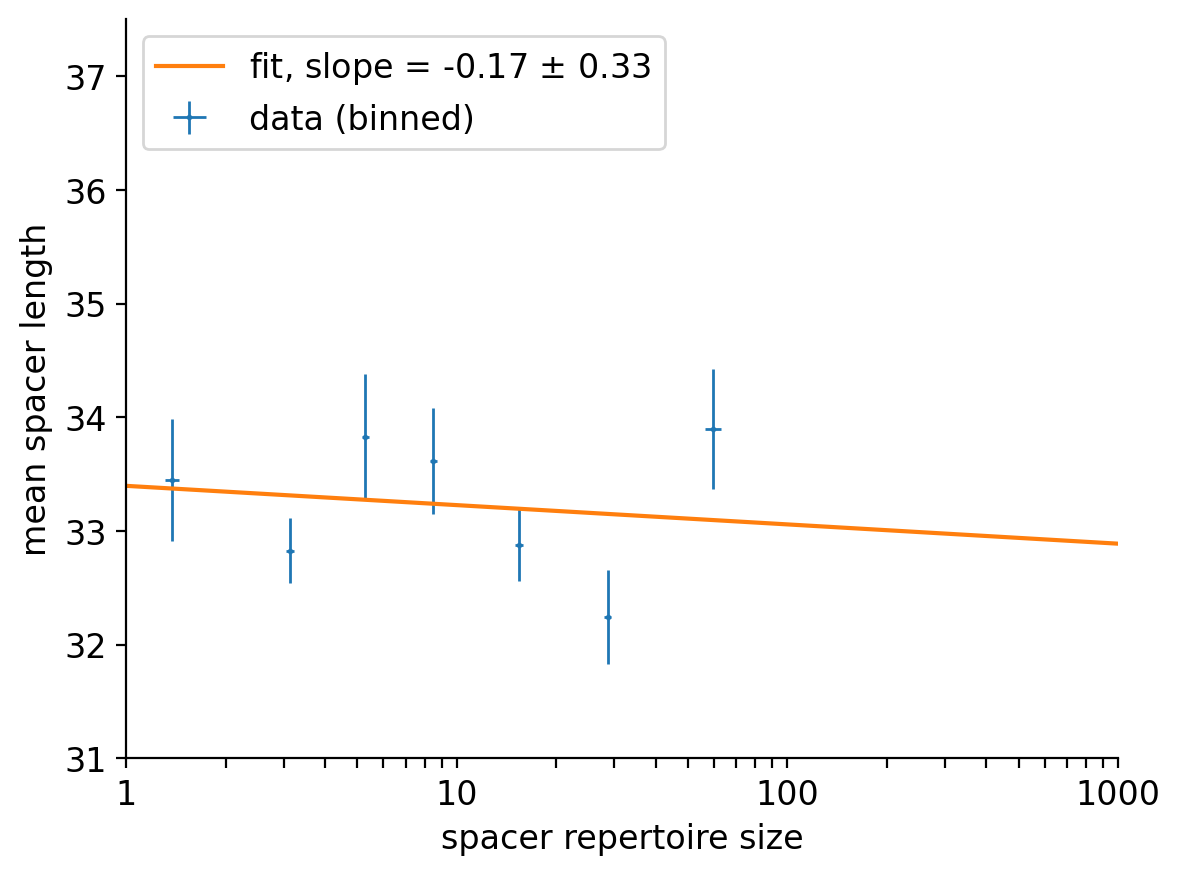

In [3]:
generate_scaling_plot(repsizes, mspacerlens, alldata=false,
    cas=false,
    saveplot=false);

In [4]:
# pvalue_linreg(m_fit, log10.(repsizes), mspacerlens)

output: 0.697426

In [5]:
# pvalue_Pearson(rho_fit, log10.(repsizes), mspacerlens)

output: 0.710338

## Fig. S2B

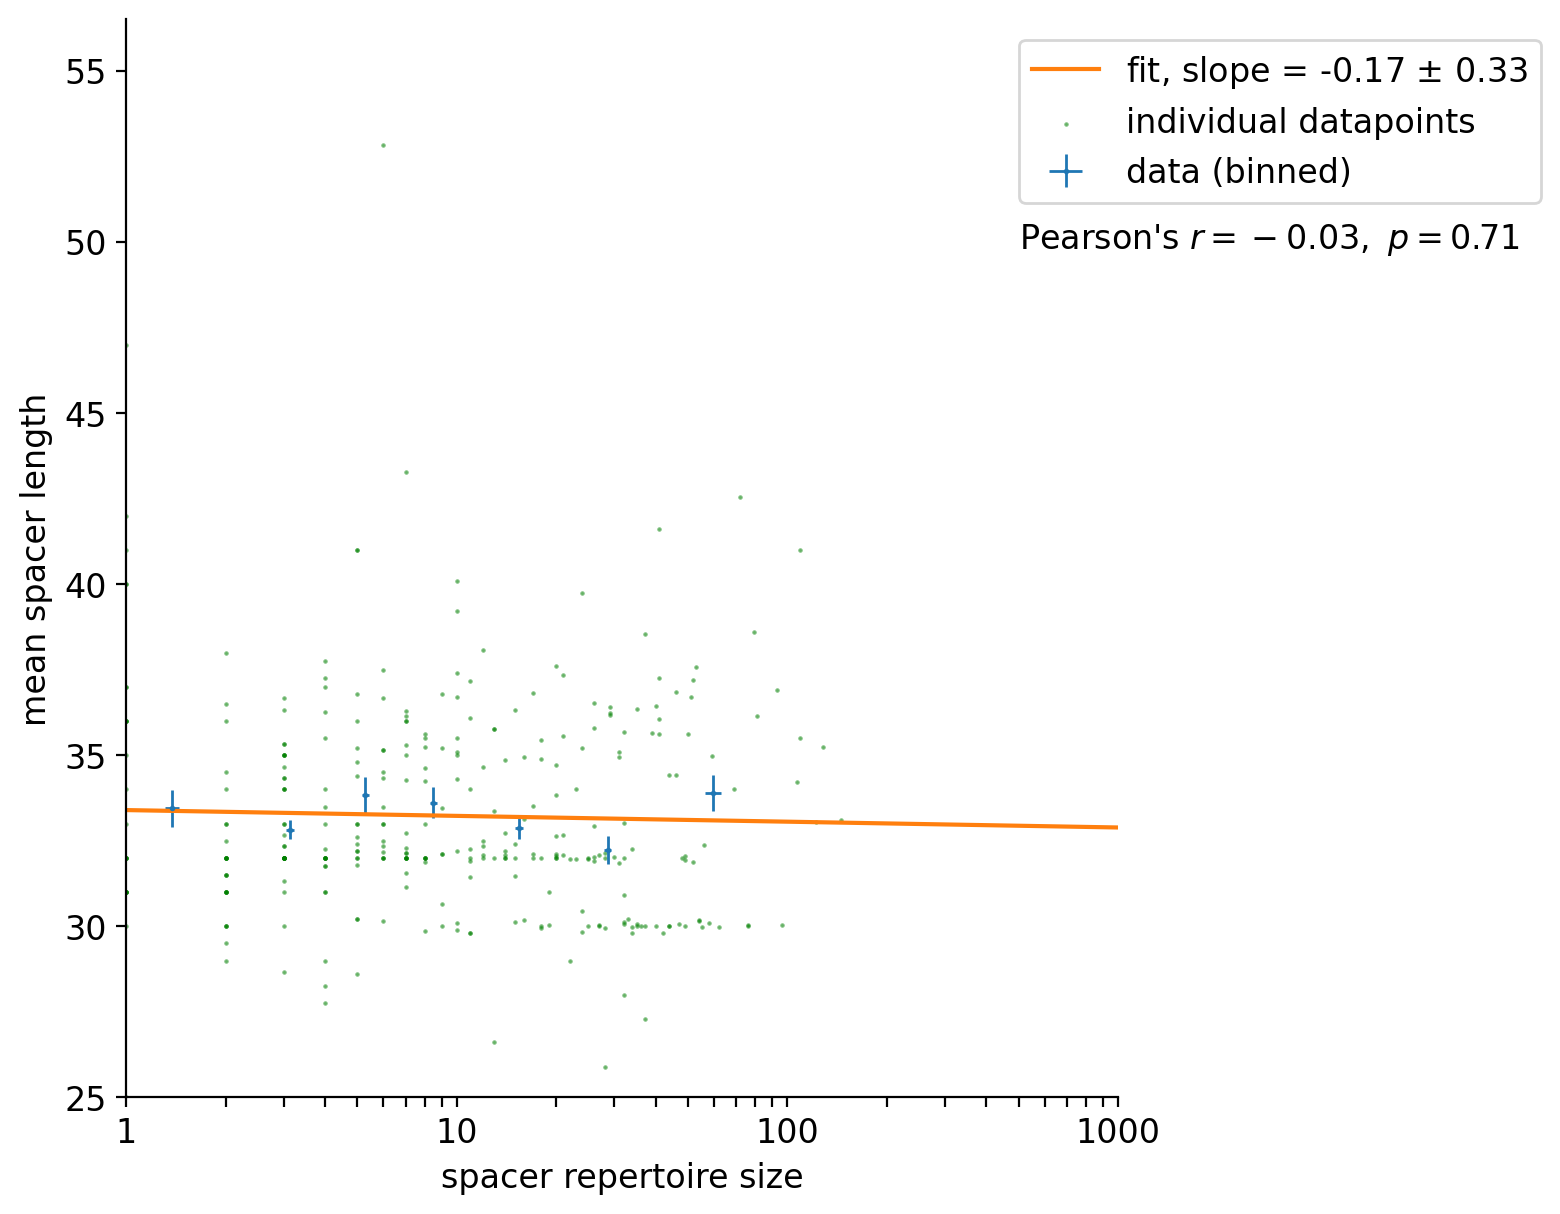

In [6]:
generate_scaling_plot(repsizes, mspacerlens,
    pvalue=0.71,
    cas=false,
    saveplot=false);

In [7]:
# no. of datapoints excluded
inds = findall(x->x<25||x>56.5,mspacerlens)
[repsizes[inds] mspacerlens[inds]]

1×2 Matrix{Float64}:
 8.0  22.0